In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
sns.set_theme(style="whitegrid")
MY_SEED = 412466  # seed as my index number

# Clustering project by Jakub Niedziela
#### The aim of this project is to cluster country data into groups, summarise the, and identify developed and undeveloped countries.

### Summary of available data:
 -  The data available has 167 observations (countries) and 9 economical features:
    - child_mort - Death of children under 5 years of age per 1000 births
    - Exports of goods and services per capita
    - health - Total health spending per capita
    - imports - Imports of goods and services per capita
    - income - Net income per capita
    - inflation - Annual growth rateof the GDP
    - life_expec - Average life expentancy
    - total_fer - Fertility rate
    - gdpp - GDP per capita
 - variables (exports, health, imports) are given as percent of GDP per capita


##### Data structure

In [3]:
data = pd.read_csv("data/Country-data.csv", index_col=0)
data.columns = ["Child_mortality", "Exports", "Health", "Imports", "Income", "GDP_growth", "Life_expectancy", "Fertility_rate", "GDPpc"]
countries = data.index
features = data.columns
data.head()

,Child_mortality,Exports,Health,Imports,Income,GDP_growth,Life_expectancy,Fertility_rate,GDPpc
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


##### Basic summary of variables

In [4]:
data.describe()

,Child_mortality,Exports,Health,Imports,Income,GDP_growth,Life_expectancy,Fertility_rate,GDPpc
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


We can see that there is high variation in GDPpc and Income variables as well as child mortality. Also because different features differ vastly it will be a good idea to use scaling before clustering.

##### Check if there are any na's

In [5]:
data[data.isna().any(axis=1)]  # no NA's in the dataframe

,Child_mortality,Exports,Health,Imports,Income,GDP_growth,Life_expectancy,Fertility_rate,GDPpc
country,,,,,,,,,


# Exploratory data analysis

Firstly, exploratory data analysis will be conducted, to find out basic information about available data

##### Histograms

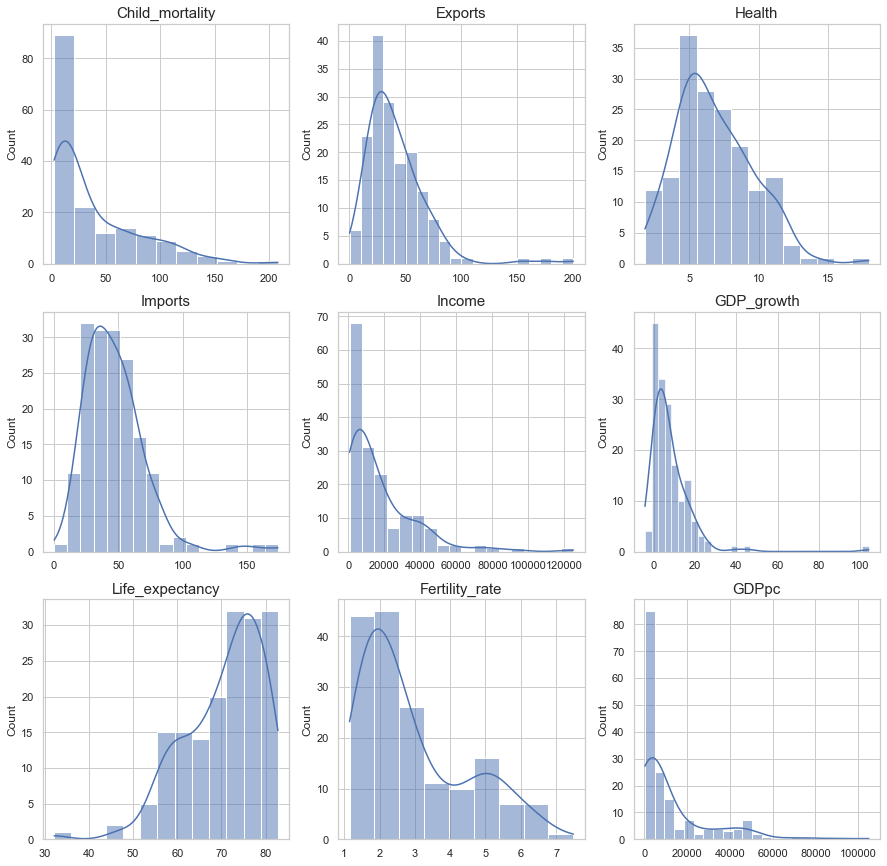

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for num, feature in enumerate(data.columns):
    sns.histplot(x=data[feature], kde=True, ax=ax[num // 3, num % 3]).set_title(feature, fontsize=15)
    ax[num // 3, num % 3].set(xlabel=None)

As we can see on histograms above, for all of the variables data is not evenly distriuted, however that is expected, as countries across the globe, and on different continents are vastly different. Hovewer for most of available variables are right skewd, with exception of life expectancy, which is left skewed. Also for some variables i.e. Exports, Imports, Income, GDP growth and GDPpc it looks like there might be some outliers, which might affect some clustering alghoritms like Kmeans.


### Boxplots

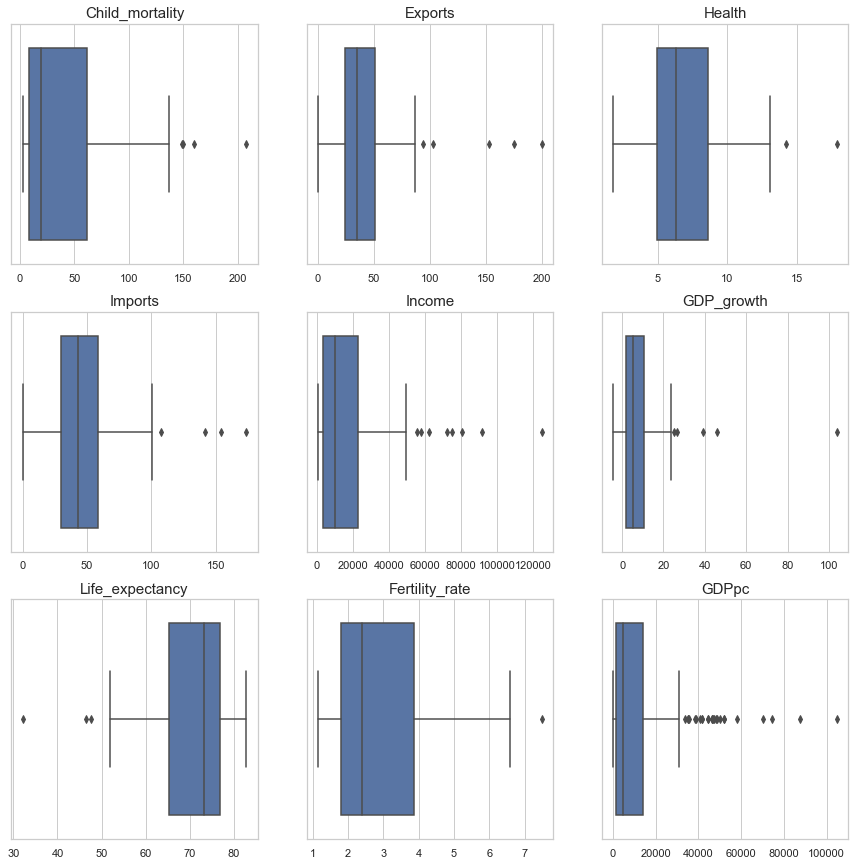

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for num, feature in enumerate(data.columns):
    sns.boxplot(x=data[feature], ax=ax[num // 3, num % 3]).set_title(feature, fontsize=15)
    ax[num // 3, num % 3].set(xlabel=None)

From plots above we can see that there might be some outliers, especially when seeing GDPpc variable, for other features outliers are also present, but their number is low when compared to the sample size. They will be deeper analysis of outliers later.

### Correlation between variables

<AxesSubplot:>

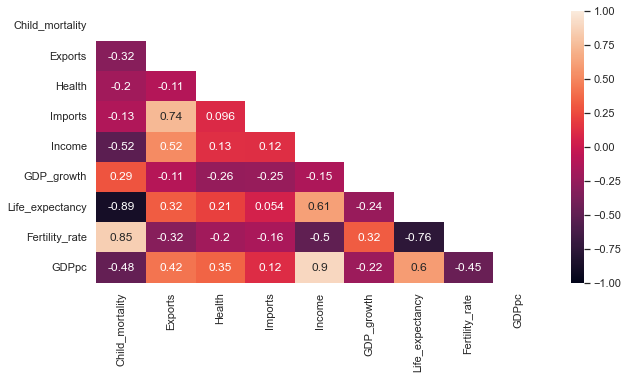

In [8]:
plt.figure(figsize=(10, 5))
corr = data.corr()
matrix = np.triu(corr)
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, mask=matrix)

It can be seen on the plot above that there is significant correlation between few variables: fertility and child mortality, fertility and life expectancy, income and GDPpc, imports and exports, life expectancy and fertility. <b>Thus I decided to drop the fertility rate, import and Income variable.</b> There is nothing unusual about the corellation between import and export, because if a given country has higher exports they need other goods that can not be produced locally so they import more. When it comes to fertility and child mortality usually in poor countries the environment is harsh for children and there is not enough support from the government to fight it, as well as people are not as aware about birth control metods, thus high fertility and child mortality. The last dropped variable is Income, which is highly corellated to the GDP per capita. This case is also easy to explain, as in more developed countries the national product is higher, which affects both incomes and GDP per capita.

In [9]:
data_final = data.drop(["Fertility_rate", "Imports", "Income"], axis=1)
countries_final = data_final.index
features_final = data_final.columns

##### In the next part I will conduct dimension reduction techniques on the dataset and compare results of clustering alghoritms on non-reduced data.

# Dimensionality reduction

## PCA - Principal Component Analysis
In this part available data will be reduced to lower number of dimension, with use of PCA which is widely know technique that reduces size of data and projects it to directions with highest variance. Thanks to this it will be easier to visualize the results and as great amount of variance is preserved.


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Before applying PCA to countries data it is important to normalise the variables, as some of them (i.e. GDPpc) has much higher values than the other variables, and it could affect the performance of algorithm.

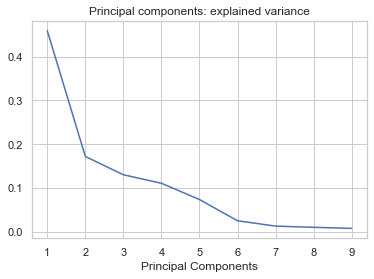

Explained variance: 
PC 1 --- 45.95%
PC 2 --- 17.18%
PC 3 --- 13.00%
PC 4 --- 11.05%
PC 5 --- 7.34%
PC 6 --- 2.48%
PC 7 --- 1.26%
PC 8 --- 0.98%
PC 9 --- 0.74%


In [11]:
X = np.array(data)

pca = PCA(random_state=MY_SEED)
scaler = StandardScaler()

pipe_pca = Pipeline(
    [
        ("scaler", scaler),
        ("pca", pca)
    ]
)

pipe_pca.fit_transform(X)



sns.lineplot(x=range(1, len(pca.explained_variance_) + 1), y=pca.explained_variance_ratio_).set_title("Principal components: explained variance")
plt.xlabel("Principal Components")
plt.show()

print("Explained variance: ")
for n, pc in enumerate(pca.explained_variance_ratio_):
    print(f"PC {n + 1} --- {pc*100:.2f}%")

As we can see above, first component explains about 46% of total variance which obviously is not enough for us. Moving on, the second compoment explains about 17% of total variance, third - 13%, fourth - 11%, fifth - 7%, sixth - 2%, seventh - 1%, eighth - <1% and ninth <1%. Because of this it is hard to choose sufficient number of components, as choosing more than 2 will require 3D plotting to visualize data, and chosing first 2 components explains only 63% of variance and after applying clustering methods, results might be biased. Because of that I decided to choose PC1 and PC2, and compare the results with clustering on full but standardised dataset.

In [12]:
pca_2 = PCA(n_components=2, random_state=MY_SEED)
scaler = StandardScaler()

pipe_pca_2 = Pipeline(
    [
        ("scaler", scaler),
        ("pca_2", pca_2)
    ]
)

X_pca_2 = pipe_pca_2.fit_transform(X)
data_pca = pd.DataFrame(X_pca_2, index=countries_final, columns=["PC1", "PC2"])

## t-SNE
It is possible that results of PCA were unsatisfactory, becuase the relationship between features is non-liner. That is why I also decided to reduce dimensions using t-SNE method, which works better with non-linear data. For this method I also choose to go with 2 components to make it easier to visualise results.

In [13]:
from sklearn.manifold import TSNE

In [14]:
X = np.array(data)

tsne = TSNE(n_components=2, random_state=MY_SEED)  # reduce data to only 2 components
scaler = StandardScaler()

pipe_tsne = Pipeline(
    [
        ("scaler", scaler),
        ("tsne", tsne)
    ]
)

X_tsne = pipe_tsne.fit_transform(X)
data_tsne = pd.DataFrame(X_tsne, index=countries_final, columns=["TSNE1", "TSNE2"])

## PCA vs t-SNE

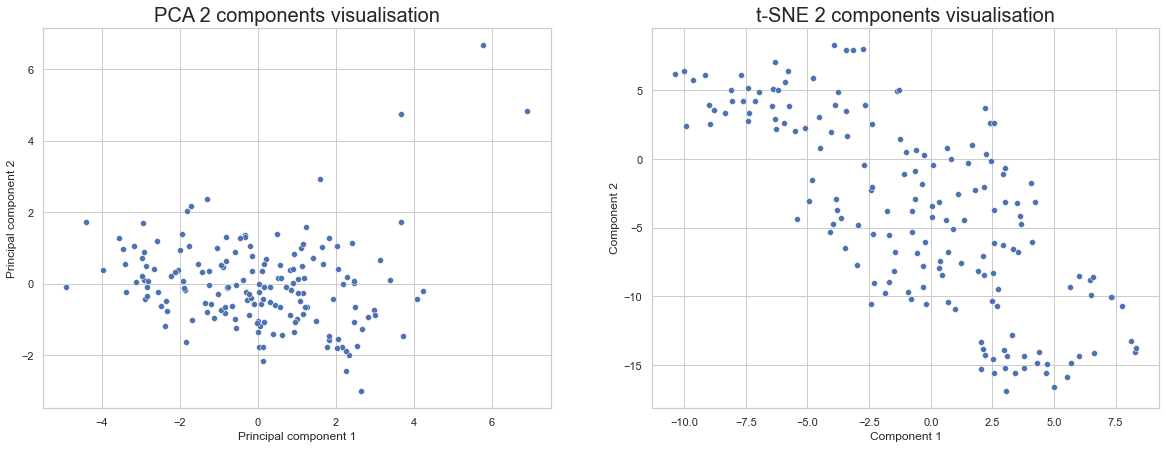

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.scatterplot(x="PC1", y="PC2", data=data_pca, ax=ax[0]).set_title("PCA 2 components visualisation", fontsize=20)
ax[0].set(xlabel="Principal component 1", ylabel="Principal component 2")

sns.scatterplot(x="TSNE1", y="TSNE2", data=data_tsne, ax=ax[1]).set_title("t-SNE 2 components visualisation", fontsize=20)
ax[1].set(xlabel="Component 1", ylabel="Component 2")

plt.show()

Two plots above present results of dimensionality reduction using PCA and t-SNE. In case of PCA datapoints are more condensed, and there are definitely some outliers, while in case of t-SNE there are no outliers. Also at this points there are no discernible clusters emerging and because of that I will use hopkins statistic to check if there is possibility to use clustering algorithms with meaningful results.

# Clustering

In this part I will conducted few clustering methods both on standardised dataset, as well as compare it with clusters obtained by applying algorithms to data with reduced dimensions. Firstly I will scale data and calculate the hopkins statistic to check if countries are clusterable. According to pyclustertend documentation (https://pyclustertend.readthedocs.io/en/latest/pyclustertend.html#module-pyclustertend.hopkins), data is highly clusterable if returned value is tending to 0, while value around 0.5 means there are no clusters, which is different to other sources which suggest that value around close to 1 is highly clusterable (this might be because of different algorithm in clustertend, and thus I provide you with link to the documenation).

In [16]:
X = np.array(data)
X_final = np.array(data_final)

#  two different scalers for recalculating purposes
scaler = StandardScaler()
scaler_final = StandardScaler()

scaled_data = pd.DataFrame(scaler.fit_transform(X), index=countries, columns=features)
scaled_data_final = pd.DataFrame(scaler_final.fit_transform(X_final), index=countries_final, columns=features_final)

### Hopkins statistic for:
 - full data (9 variables), 
 - data without highly correlated variables (6 variables), 
 - data after PCA reduction, 
 - data after t-SNE reduction

In [17]:
from pyclustertend import hopkins, ivat

In [18]:
print(f"Hopkins statistic for full data: {hopkins(data, len(scaled_data)):.2f}")
print(f"Hopkins statistic for truncated data: {hopkins(data_final, len(scaled_data_final)):.2f}")
print(f"Hopkins statistic for PCA data: {hopkins(data_pca, len(data_pca)):.2f}")
print(f"Hopkins statistic for t-SNE: {hopkins(data_tsne, len(data_pca)):.2f}")

Hopkins statistic for full data: 0.09
Hopkins statistic for truncated data: 0.19
Hopkins statistic for PCA data: 0.19
Hopkins statistic for t-SNE: 0.26


##### From results presented above, we can see that while datasets with reduced number of features are less clusterable than the original one, their values are still low and we can start applying clustering algorithms.

### VAT - Visual assessment of tendency

It is useful algorithm to get insights about possible number of clusters in dataset. It plots distances between observations, and black color sugests that the distance between two observations is smaller, while the white color oppositely.

#### VAT for full dataset

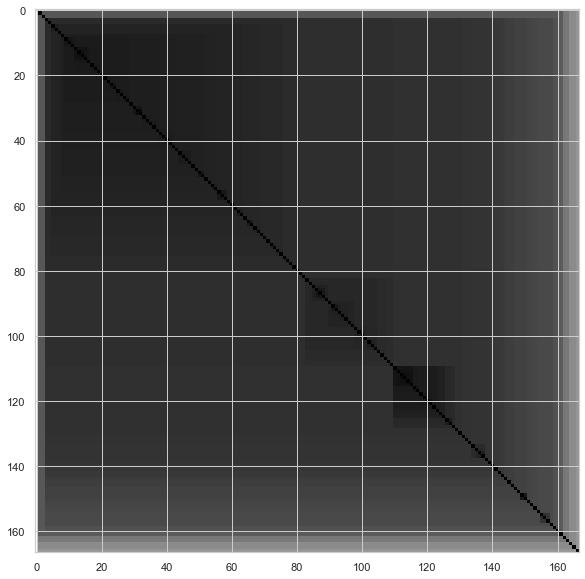

In [19]:
ivat(scaled_data)

#### VAT for truncated dataset

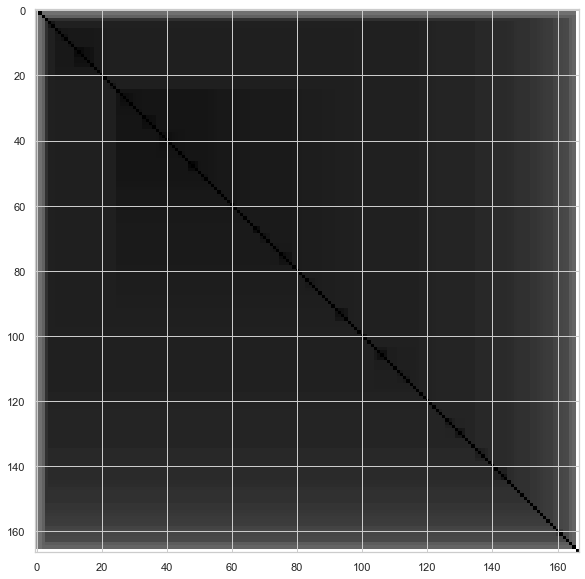

In [20]:
ivat(scaled_data_final)

#### VAT for PCA dataset

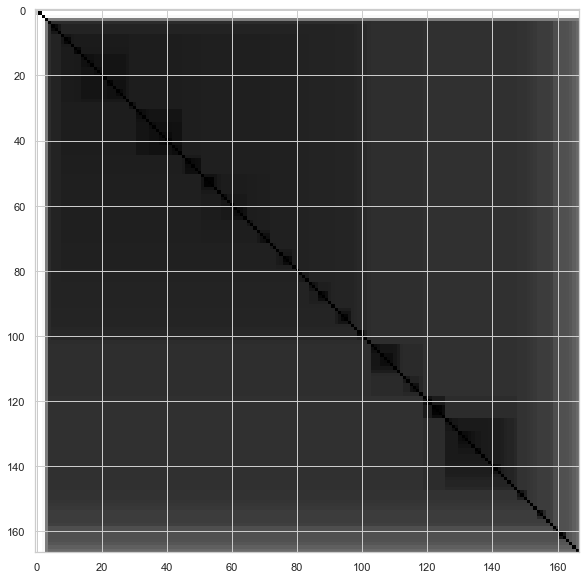

In [21]:
ivat(data_pca)

#### VAT for t-SNE dataset

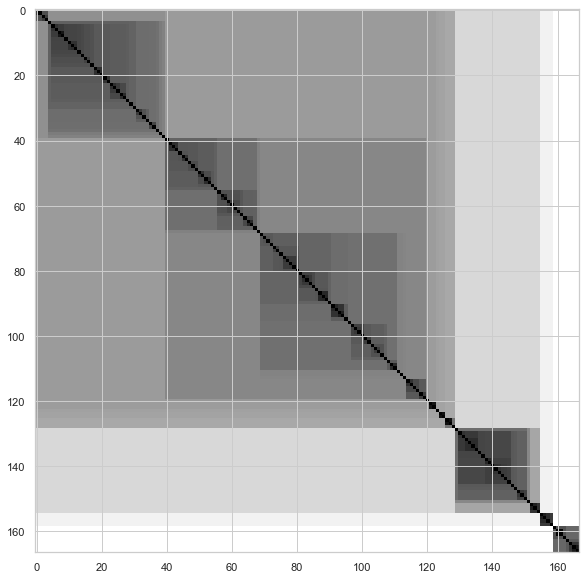

In [22]:
ivat(data_tsne)

#### VAT Plots Summary

As it can be seen on plots above, for the first three datasets it is hard to select amount of clusters, but fortunately for t-SNE data the VAT plot is clear, and suggests that there might be about 5 clusters.

## Clustering - KMeans, KMedoids
In this part I will use 2 different clustering methods firstly to determine the correct number of cluster and then to compare results.

### Number of clusters

In [23]:
from sklearn.cluster import KMeans  # , DBSCAN
from sklearn.metrics  import silhouette_score, calinski_harabasz_score
from sklearn_extra.cluster import KMedoids  # PAM - partitioning around medoids

#### Silhouette and Calinski-Harabsz score
To compare 2 methods of clustering and 4 datasets i will use silhouette width and calinski-harabasz score as these methods are more robust and yield better results than inertia

In [24]:
kmeans_results = {"silhouette": [], "ch_score": [], "dataset": [], "k": []}
pam_results = {"silhouette": [], "ch_score": [], "dataset": [], "k": []}
datasets_to_cluster = {"scaled_data": scaled_data, "scaled_data_final": scaled_data_final,  "data_pca": data_pca, "data_tsne": data_tsne}

for dataset_name, dataset in datasets_to_cluster.items():
    for k in range(2, 11):
        model_kmeans = KMeans(n_clusters=n, random_state=MY_SEED).fit(dataset)

        silhouette_km = silhouette_score(dataset, model_kmeans.labels_)
        ch_score_km = calinski_harabasz_score(dataset, model_kmeans.labels_)

        kmeans_results["silhouette"].append(silhouette_km)
        kmeans_results["ch_score"].append(ch_score_km)
        kmeans_results["dataset"].append(dataset_name)
        kmeans_results["k"].append(k)

        model_pam = KMedoids(n_clusters=k, random_state=MY_SEED).fit(dataset)

        silhouette_pam = silhouette_score(dataset, model_pam.labels_)
        ch_score_pam = calinski_harabasz_score(dataset, model_pam.labels_)
            
        pam_results["silhouette"].append(silhouette_pam)
        pam_results["ch_score"].append(ch_score_pam)
        pam_results["dataset"].append(dataset_name)
        pam_results["k"].append(k)

kmeans_results = pd.DataFrame(kmeans_results)
pam_results = pd.DataFrame(pam_results)

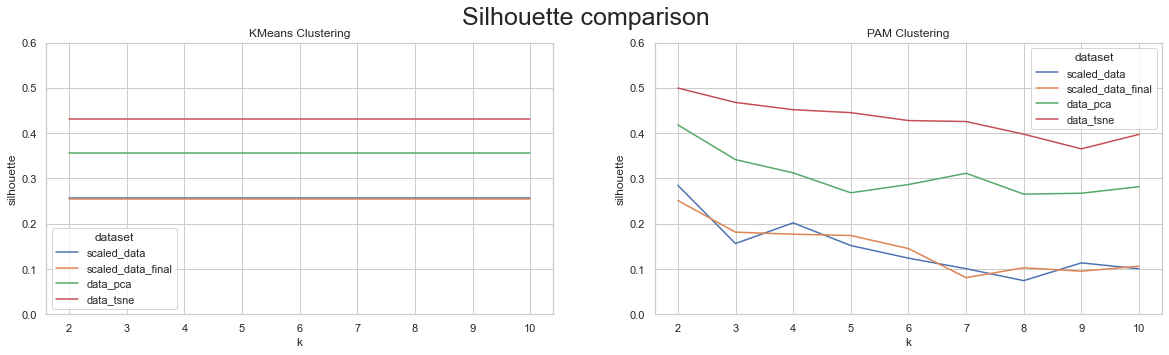

Text(0.5, 0.98, 'Calinski-Harabasz Score comparison')

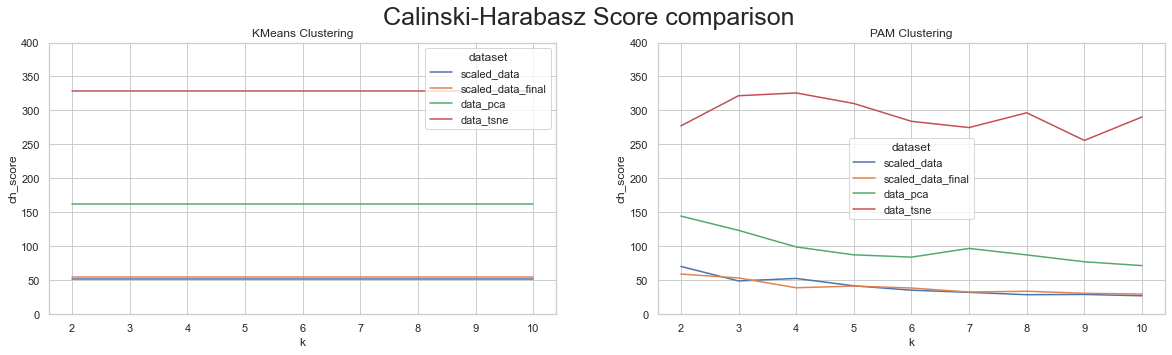

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

# Silhouette
sns.lineplot(x="k", y="silhouette", data=kmeans_results, hue="dataset", ax=ax[0]).set_title("KMeans Clustering")
ax[0].set(ylim=(0, 0.6))
sns.lineplot(x="k", y="silhouette", data=pam_results, hue="dataset", ax=ax[1]).set_title("PAM Clustering")
ax[1].set(ylim=(0, 0.6))
fig.suptitle("Silhouette comparison", fontsize=25)
plt.show()

fig, ax = plt.subplots(1, 2, figsize = (20, 5))

# CH Score
sns.lineplot(x="k", y="ch_score", data=kmeans_results, hue="dataset", ax=ax[0]).set_title("KMeans Clustering")
ax[0].set(ylim=(0, 400))
sns.lineplot(x="k", y="ch_score", data=pam_results, hue="dataset", ax=ax[1]).set_title("PAM Clustering")
ax[1].set(ylim=(0, 400))
fig.suptitle("Calinski-Harabasz Score comparison", fontsize=25)

From the plots above, we can see that for all dataset and for all clustering algorithms dataset reduced with t-SNE dimensionality reduction yields best results as we aim to achieve silhouette as close to 1 as it is possible and the higher the Calinski-Harabasz score the better. When it comes to comparison of KMeans and PAM - PAM is better for lower number of clusters but worse for higher nuber, also for datasets on which dimensionality reduction was not applied it behaves worse than KMeans. 

We can conclude that the dataset which is most suitable for clustering is the one with applied t-SNE method, which confirms my predictions about non-linear relationships between variables as well as backs up the Visual assessment of tendency plots. Moreover due to using t-SNE dataset it will be easier to visualise obtained clusters. 

When it comes to chosing optimal number of clusters, I believe that optimal number would be 3 clusters and the optimal method would be PAM, as it yields slightly better results. Although it is possible that after examining final clusters it might be more sensible to change this number to 4 clusters, dependant on distribution of countries in each group. Because of that I will visualise both numbers of clusters and 

### Final number of clusters
 - PAM with 3 and 4 clusters using t-SNE data

In [26]:
X = np.array(data_tsne)

pam_3 = KMedoids(n_clusters=3, random_state=MY_SEED)
pam_3.fit(X)
labels_3 = pam_3.labels_

pam_4 = KMedoids(n_clusters=4, random_state=MY_SEED)
pam_4.fit(X)
labels_4 = pam_4.labels_

Text(0.5, 0.98, 'Clusters visualisation')

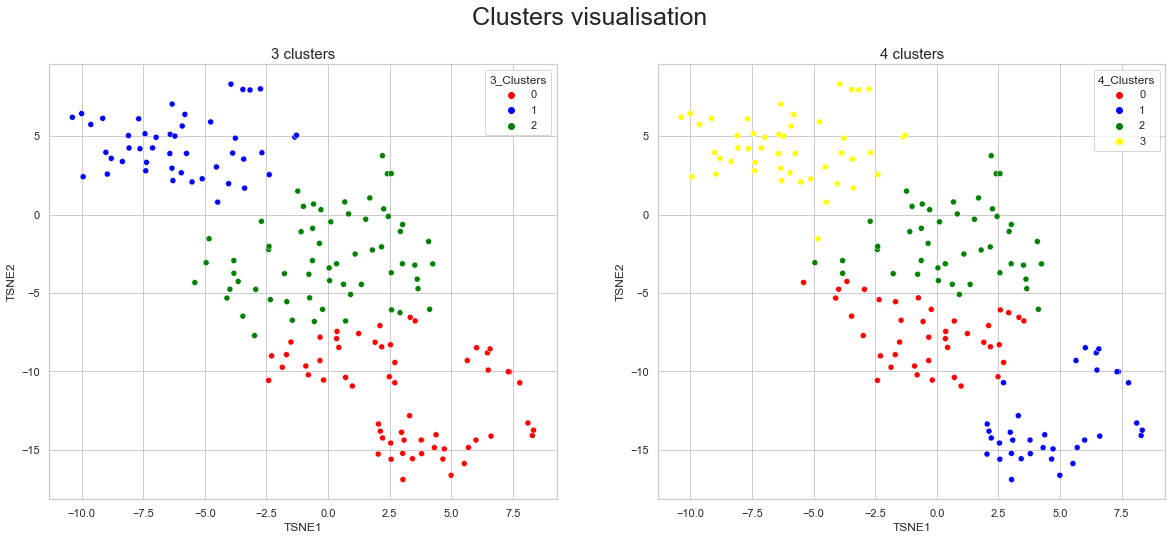

In [27]:
data_tsne_labels = data_tsne
data_tsne_labels["3_Clusters"] = labels_3
data_tsne_labels["4_Clusters"] = labels_4

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.scatterplot(x="TSNE1", y="TSNE2", data=data_tsne_labels, hue="3_Clusters", ax=ax[0], palette=["red", "blue", "green"]).set_title("3 clusters", fontsize=15)
sns.scatterplot(x="TSNE1", y="TSNE2", data=data_tsne_labels, hue="4_Clusters", ax=ax[1], palette=["red", "blue", "green", "yellow"]).set_title("4 clusters", fontsize=15)
fig.suptitle("Clusters visualisation", fontsize=25)

Plots above depict points aggregation to clusters calculated by PAM method on t-SNE dataset. On the left plot there are 3 clusters and on the righ - 4 clusters. We can see that 1 group is very simmiliar (blue on left plot, yellow on right plot), while red group on left get's dived into 2 and expands to some points from the green group. For me the better clustering behaviour is represented by using 4 as number of clusters, because there is distinct group on the down-right corner. Let's connect assigned clusters to original dataset and see what characterises each group and determin which countries are well developed and which are not.

In [28]:
data_clustered = data.merge(data_tsne_labels, left_index=True, right_index=True)
data_clustered["country"] = data_clustered.index

### Clusters analysis

In [29]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data_clustered.groupby("4_Clusters")[data_clustered.columns[:9]].agg(["min", "max", "mean", "median", "var"]).T

4_Clusters                        0             1            2            3
Child_mortality min           3.200         2.600        8.700       36.900
                max          42.700        16.600      130.000      208.000
                mean         14.290         5.894       29.644       91.047
                median       12.450         4.500       21.500       89.300
                var          87.809        12.442      447.468     1141.314
Exports         min          29.700        12.400        0.109        2.200
                max          93.800       200.000       76.300       85.800
                mean         54.073        58.271       28.766       29.113
                median       51.300        50.200       26.900       23.800
                var         254.895      1800.847      175.624      330.178
Health          min           3.400         1.810        1.970        2.200
                max          11.700        17.900       10.900       14.200
                mean          7.134         8.429        5.521        6.583
                median        7.020         9.480        5.250        5.690
                var           3.400        12.496        3.146        8.336
Imports         min          38.100        13.600        0.066       17.200
                max         108.000       174.000       61.800      101.000
                mean         62.575        49.149       34.548       43.677
                median       62.450        37.400       32.400       42.700
                var         202.943      1378.685      224.791      331.594
Income          min        1780.000     27200.000     1990.000      609.000
                max       30400.000    125000.000    23100.000    33700.000
                mean      14624.750     47197.143     9839.778     3903.894
                median    14750.000     41100.000     9350.000     1870.000
                var    56625276.859 416269697.479 30973120.404 31804470.184
GDP_growth      min          -4.210        -3.220        0.480        0.885
                max          15.100        17.200      104.000       26.500
                mean          3.911         4.055       11.922        9.888
                median        2.485         1.770        7.140        8.790
                var          18.703        29.143      279.638       53.462
Life_expectancy min          61.700        75.100       60.500       32.100
                max          80.100        82.800       80.400       71.100
                mean         73.912        79.980       72.007       59.291
                median       74.300        80.400       71.600       59.500
                var          15.643         4.225       18.436       42.309
Fertility_rate  min           1.230         1.150        1.570        2.590
                max           4.240         3.030        5.840        7.490
                mean          1.965         1.875        2.558        4.957
                median        1.745         1.870        2.470        5.050
                var           0.463         0.208        0.641        1.119
GDPpc           min         880.000     12100.000      592.000      231.000
                max       28000.000    105000.000    13500.000    17100.000
                mean       8747.500     42817.143     5014.044     1933.660
                median     6970.000     41800.000     4090.000      897.000
                var    43371506.410 372152638.655 12566164.453  8753919.925

#### Summary

The table above presents summary statistics for obtained clusters. 

For example we can see that in the group 0 there are highest average values for exports and imports as well as second lowest average child mortality and ferility rate. Also countries in this group have second highest life expectancy, income and GDPpc, as the values for different features are not highest amongst cluster I would classify them as countries aiming to become highly developed with a good comfort of life. 

Group 1 has lowest child mortality and fertility rate, also with small variance. Furthermore their GDPpc, Income, Health Spendings and Life Expectancy values are highest of all groups. These are definitely developed countries in which comfort of live is high. Although GDP growth is lower in this countries it is nothing unusual, as wealthy countries have smaller growth if they reach stead-state (according to Solow model). Propably these are mostly European and North American countries.

Group 2 has second lowest income, GDPpc and health spendings as well as lowest imports and exports. However GDP growth is second highest and the life expectancy is not as low as in group 3. The values of child mortality and fetility rate as not as good as in group 1 and group 0, but are definitely improved in comparison to group 3. The standard of living in these countries is not good enough to count them into countries aiming to become highly developed ones, but they can be names as ones that are in transition from worst to better.

Group 3 has highest child mortality and fertility rate values and lowest Income, life expectancy and GDPpc. These are poor, underdeveloped countries, where life quality is at low level and mostly there is no hope because of politcal wars. I believe that these are mostly African countries.

Now let's see which countries belong to each group and check if predictions were correct.

### Final clusters

#### Cluster 0

In [30]:
print(data_clustered.index[data_clustered["4_Clusters"] == 0])

Index(['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belarus', 'Belize',
       'Bhutan', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
       'Czech Republic', 'Estonia', 'Fiji', 'Georgia', 'Guyana', 'Hungary',
       'Jordan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Moldova',
       'Montenegro', 'Panama', 'Paraguay', 'Poland', 'Serbia', 'Seychelles',
       'Slovak Republic', 'Slovenia', 'Solomon Islands', 'South Korea',
       'Suriname', 'Thailand', 'Tunisia', 'Ukraine', 'Vietnam'],
      dtype='object', name='country')


#### Cluster 1

In [31]:
print(data_clustered.index[data_clustered["4_Clusters"] == 1])

Index(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada',
       'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Libya',
       'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Oman',
       'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'],
      dtype='object', name='country')


#### Cluster 2

In [32]:
print(data_clustered.index[data_clustered["4_Clusters"] == 2])

Index(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Bolivia', 'Brazil', 'Cambodia', 'Cape Verde', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Grenada', 'Guatemala', 'India', 'Indonesia',
       'Iran', 'Jamaica', 'Kazakhstan', 'Mongolia', 'Morocco', 'Myanmar',
       'Nepal', 'Nigeria', 'Peru', 'Philippines', 'Romania', 'Russia', 'Samoa',
       'Sri Lanka', 'St. Vincent and the Grenadines', 'Tajikistan', 'Tonga',
       'Turkey', 'Turkmenistan', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela'],
      dtype='object', name='country')


#### Cluster 3

In [33]:
print(data_clustered.index[data_clustered["4_Clusters"] == 3])

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.',
       'Mozambique', 'Namibia', 'Niger', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')


### Final clusters summary

As it can be seen above predictions about clusters were mostly correct - cluster 3 mainly contains poor and uderdeveloped African countries, while in cluster 1 there are rich, well-developed countries. Although some predictions might be against better judgment - Russia and China in cluster 2, this might be due to high population of these countries. Overally I am satisfied with these 4 clusters, and later further analysis should be taken to determine factors that affect placement of countries in better groups.

# Project Summary

To sum up in this notebook I have transformed worldwide countries data into meningfull clusters. Firstly I have used EDA (exploratory data analysis) to get some idea about available variables and reduced size of dataset firstly by eliminating highly correlated variables. After that I applied two dimensionality reduction techniques which included PCA (principal component analysis) and t-SNE (t-distributed stochastic neighbor embedding). The first method works best on non-linear data, and because of that, 2 chosen factors explained only about 65% of total variance. The second method is usually applied if data is non-linear and it work much better than PCA in this case. Furthermore I have checked if it is possible to obtain meningful clusters using hopkins statistic and VAT (visual assessment of tendency), which confirmed that meaningful clusters can be obtained. After that I applied both KMeans and PAM (KMedoids) methods on scaled datasets (full dataset, dataset without high correlations, dataset after PCA and dataset after t-SNE). For each of the iterations (methods x datasets) I have calculated silhouette score and calinski-harabasz score to select optimal number of clusters. Because both 3 and 4 clusters gave similar statistics I decided to compare them visually. After visualisation it was clear that 4 clusters were optimal. In the end I have analysed obtained clusters and commented on countries in different clusters.